<a href="https://colab.research.google.com/github/evolution07770/ai/blob/main/PyTorch_%E7%B7%9A%E5%BD%A2%E5%9B%9E%E5%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#線形回帰モデル

## from scratch

---


In [ ]:
import torch

#真の係数
w_true = torch.Tensor([1,2,3])

# Xのデータの準備、切片を回帰係数に含めるため、
# Xの最初の次元に１を追加しておく
X = torch.cat([torch.ones(100,1),torch.randn(100,2)], 1)

# 真の係数と各Xとのない席を行列よベクトルの席でまとめて計算
y = torch.mv(X, w_true) + torch.randn(100) * -0.5

# 勾配降下で最適化するためのパラメータのTensorを
# 乱数で初期化して作成
w = torch.randn(3, requires_grad = True)

#学習率
gamma = 0.1

# 損失関数のログ
losses = []

# 100回イテレーションを回す
for epoc in range(100):
  # 前回のbackwardメソッド計算された勾配の値を削除
  w.grad = None

  # 線形モデルでyの予測値を計算
  y_pred = torch.mv(X, w)

  # MSE lossとwによる微分を計算
  loss = torch.mean((y - y_pred)**2)
  loss.backward()

  # 勾配を更新する
  # wをそのまま代入して更新すると異なるTensorになって
  # 計算グラフが破壊されてしまうのでdataだけを更新する
  w.data = w.data - gamma * w.grad.data

  #収束確認のためにlossを記録しておく
  losses.append(loss.item())


### 失関数の収束
最適化が正しく行われたかどうかは、損失関数が収束しているかどうかで確認出来ます。


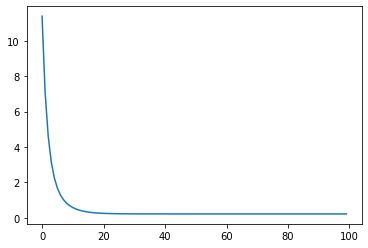

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)


### 回帰係数の確認

In [ ]:
# 回帰係数の確認
w

tensor([0.9893, 2.1106, 2.9980], requires_grad=True)

## NN、optimモジュールの使用


---
nn.Linearはその名の通り、線形結合を計算するためのクラスで、回帰係数や切片項などのパラメータを含んでいます。nn.Linearは、nn.Moduleのサブスクで、SGDなどのオプティマイザーと連携したり、学習結果のパラメータを保存したりするなど様々な機能を備えています。 nn.MSELossはその名の通りMSEを計算するためのクラスです。MSEくらいの単純な損失関数でしたら自分自身で書いてもたいした手間はかからないが、せっかくPyTorchにあるので使いましょう。


In [ ]:
from torch import nn, optim

# Linear 層を作成。今回は切片項は回帰係数に含めるので
# 入力の次元を３とし、bias（切片）をFalseにする
net = nn.Linear(in_features=3, out_features=1, bias=False)

# SGDのオプティマイザーに上で定義したネットワークの
# パラメータを渡して初期化
optimizer = optim.SGD(net.parameters(), lr=0.1)

# MSE lossクラス
loss_fn = nn.MSELoss()

# 損失関数のログ
losses_nn = []

# 100回イテレーションを回す
for epoc in range(100):
  # 前回のbackwardメソッドで計算された勾配の値を削除
  optimizer.zero_grad()

  #
  y_pred = net(X)

  # 
  # 
  loss = loss_fn(y_pred.view_as(y), y)

  #
  loss.backward()

  #
  optimizer.step()

  #
  losses_nn.append(loss.item())


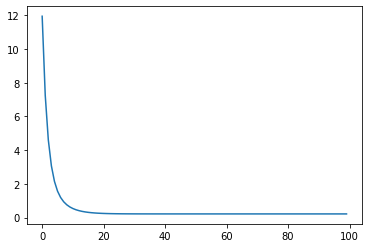

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses_nn)

In [ ]:
list(net.parameters())

[Parameter containing:
 tensor([[0.9893, 2.1106, 2.9980]], requires_grad=True)]

### nn.MSELossの説明
nn.MSELoss(size_average=None, reduce=None, reduction: str='mean') -> None

Creates a criterion that measures the mean squared error (squared L2 norm) between
each element in the input x and target y.

The unreduced (i.e. with reduction set to 'none') loss can be described as:

where N is the batch size. If reduction is not 'none'
(default 'mean'), then:

x and y are tensors of arbitrary shapes with a total
of n elements each.

The mean operation still operates over all the elements, and divides by n.

The division by n can be avoided if one sets reduction = 'sum'.

Args:
    size_average (bool, optional): Deprecated (see reduction). By default,
        the losses are averaged over each loss element in the batch. Note that for
        some losses, there are multiple elements per sample. If the field size_average
        is set to False, the losses are instead summed for each minibatch. Ignored
        when reduce is False. Default: True
    reduce (bool, optional): Deprecated (see reduction). By default, the
        losses are averaged or summed over observations for each minibatch depending
        on size_average. When reduce is False, returns a loss per
        batch element instead and ignores size_average. Default: True
    reduction (string, optional): Specifies the reduction to apply to the output:
        'none' | 'mean' | 'sum'. 'none': no reduction will be applied,
        'mean': the sum of the output will be divided by the number of
        elements in the output, 'sum': the output will be summed. Note: size_average
        and reduce are in the process of being deprecated, and in the meantime,
        specifying either of those two args will override reduction. Default: 'mean'

Shape:
    - Input: (N, *) where * means, any number of additional
      dimensions
    - Target: (N, *), same shape as the input

Examples:

>>> loss = nn.MSELoss()

>>> input = torch.randn(3, 5, requires_grad=True)

>>> target = torch.randn(3, 5)

>>> output = loss(input, target)

>>> output.backward()

**--翻訳**

間の平均二乗誤差（二乗L2ノルム）を測定する基準を作成します
入力xとターゲットyの各要素。

削減されていない（つまり、削減が「なし」に設定されている）損失は、次のように説明できます。

ここで、Nはバッチサイズです。削減が「なし」でない場合
（デフォルトの「平均」）、次に：

xとyは、合計で任意の形状のテンソルです。
それぞれn個の要素の。

平均演算は引き続きすべての要素で動作し、nで除算します。

削減= '合計'を設定すると、nによる除算を回避できます。

Args：
    size_average（bool、オプション）：非推奨（削減を参照）。デフォルトでは、
        損失は​​、バッチ内の各損失要素で平均化されます。のために注意してください
        いくつかの損失、サンプルごとに複数の要素があります。フィールドsize_averageの場合
        Falseに設定されている場合、損失はミニバッチごとに合計されます。無視されます
        reduceがFalseの場合。デフォルト：True
    reduce（bool、オプション）：非推奨（reductionを参照）。デフォルトでは、
        損失は​​、各ミニバッチの観測値に応じて平均化または合計されます
        size_averageで。 reduceがFalseの場合、
        代わりにバッチ要素であり、size_averageを無視します。デフォルト：True
    削減（文字列、オプション）：出力に適用する削減を指定します。
        「なし」| 「平均」| '和'。 'none'：削減は適用されません。
        「平均」：出力の合計は、の数で除算されます
        出力の要素 'sum'：出力が合計されます。注：size_average
        およびreduceは非推奨になる過程にあり、その間、
        これらの2つの引数のいずれかを指定すると、削減が上書きされます。デフォルト：「平均」

形状：
    -入力：（N、*）ここで、*は、任意の数の追加を意味します
      寸法
    -ターゲット：（N、*）、入力と同じ形状

